In [215]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [216]:
# Make sure we are in the right directory and that our input files exist
os.chdir('C:/Users/toddm/code/data-science-take-home-mrjxzx/')  # Genentech, you'll need to change this path
data_dir = './data/'
required_files = ['test', 'train']  # Minimum required files for this code to work
for file in required_files:
    if not os.path.exists(data_dir + file + '.csv'):
        raise FileExistsError('{} does not exit, exiting'.format(file))
    globals()['%s' % file] = pd.read_csv(data_dir + file + '.csv')

In [217]:
# To be safe, make deep copies of dataframes to work with
train_df = train.copy(deep=True)
test_df = test.copy(deep=True)

In [218]:
# Drop columns we know we don't need
columns_to_drop = ['customer_id', 'Name', 'security_no', 'referral_id']
train_df.drop(columns_to_drop, axis=1, inplace=True)
test_df.drop(columns_to_drop, axis=1, inplace=True)

In [219]:
# Drop duplicate rows
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

In [220]:
# Drop rows with any NaN value
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [223]:
# Drop age, almost uniformly distruibuted
train_df.drop(['age'], axis=1, inplace=True)
test_df.drop(['age'], axis=1, inplace=True)

In [211]:
train_df['gender'].replace(['F', 'M'], [0, 1], inplace=True)

In [212]:
train_df.isna().any()

age                             False
gender                          False
region_category                  True
membership_category             False
joining_date                    False
joined_through_referral         False
preferred_offer_types            True
medium_of_operation             False
internet_option                 False
last_visit_time                 False
days_since_last_login           False
avg_time_spent                  False
avg_transaction_value           False
avg_frequency_login_days        False
points_in_wallet                 True
used_special_discount           False
offer_application_preference    False
past_complaint                  False
complaint_status                False
feedback                        False
churn_risk_score                False
dtype: bool

In [238]:
# Drop columns with small numbers of unique values
unique_counts = {}
for i, column in enumerate(train_df.columns):
    unique_counts[i] = train_df[column].nunique()
unique_counts

{0: 3,
 1: 3,
 2: 6,
 3: 1096,
 4: 3,
 5: 3,
 6: 4,
 7: 3,
 8: 24196,
 9: 27,
 10: 21050,
 11: 28312,
 12: 1266,
 13: 20977,
 14: 2,
 15: 2,
 16: 2,
 17: 5,
 18: 9,
 19: 6}

In [224]:
train_df.columns

Index(['gender', 'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [ ]:
# 36992 rows and 25 columns; null values for 'region_category', 'preferred_offer_types', and 'points_in_wallet'

In [ ]:
# Drop columns that will not be needed
columns_to_drop = ['customer_id', 'Name', 'security_no', 'referral_id']

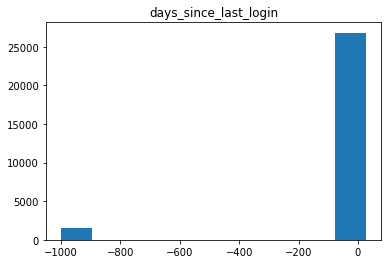

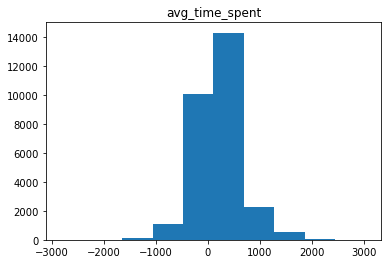

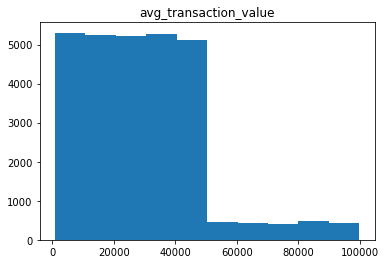

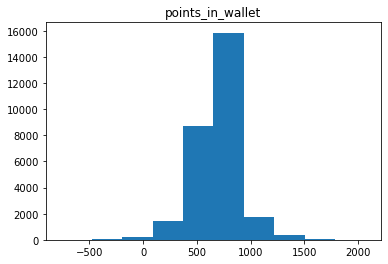

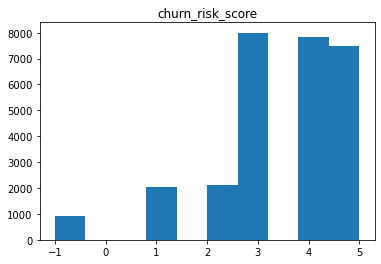

In [225]:
# Have a look at the data to see where we need to deal with outliers
for column in train_df.describe().columns:
    plt.title(column)
    plt.hist(train_df[column])
    plt.show()

In [229]:
train_df.membership_category.unique()

array(['Platinum Membership', 'No Membership', 'Gold Membership',
       'Basic Membership', 'Silver Membership', 'Premium Membership'],
      dtype=object)

In [237]:
for idx, val in enumerate(train_df.region_category.unique()):
    print(idx, val)
    train_df.region_category

0 Village
1 Town
2 City
